In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed

In [2]:
name = 'network_04'
tracks = 'tracks_04'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = f'/home/ADF/ajl573/Data/interstellar_data/{tracks}'

In [3]:
train = pd.read_csv(f'{load_path}/{tracks}_train.csv')
val = pd.read_csv(f'{load_path}/{tracks}_val.csv')

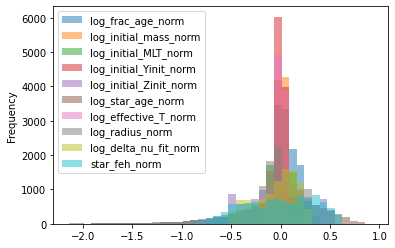

In [4]:
train.sample(n=10000).plot(kind='hist', bins=40, alpha=0.5)

In [6]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'log_initial_MLT_norm',
          'log_initial_Yinit_norm', 'log_initial_Zinit_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

In [7]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 6020261
Length of validation data = 1505065


In [19]:
len(train)%500

261

In [20]:
n_batches = np.arange(500, 2000)  # Select a range where number of batches is reasonable
r = (len(train)) % n_batches 

# Print whole multiples of training size
print(f'choose number of batches from:\n{n_batches[r==0]}')

choose number of batches from:
[]


No matches, so we choose remainders less than 10

In [36]:
print(f'choose number of batches from:\n{n_batches[r<20]}')

choose number of batches from:
[ 523  528  541  575  612  626  665  690  698  750  823  844  849  856
  918 1013 1019 1045 1047 1056 1082 1093 1150 1279 1377 1391 1463 1477
 1569 1725 1745 1836 1889 1981]


We can afford to drop 20 points randomly and this gives us more choice for the number of batches. Since we've added more points we should think about keeping the number of batches fairly high. Let's choose 750

In [39]:
n_drop = r[n_batches==750]
n_drop

array([11])

In [40]:
seed = 101
train = train.sample(n=len(train)-n_drop, random_state=seed)

Double-check

In [42]:
len(train) % 750

0

In [43]:
depth = 6
width = 128
activation = 'elu'
batch_size = len(train)//750
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [44]:
network = DenseNetwork(path=save_path, name=name, depth=depth, width=width,
                       activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

In [45]:
network.build(len(x_cols), len(y_cols))

In [46]:
network.compile(optimizer=optimizer, loss=loss, metrics=metrics)
network.save()

In [ ]:
network.train(train, x_cols, y_cols, epochs=5000, validation_split=None, validation_data=val,
              callbacks=['checkpoint', 'tensorboard'])

In [ ]:
network.save()

In [ ]:
network.scores(val.sample(20000))

In [ ]:
network.plot_metric(val.sample(20000), metric='absolute_error');